# <center> An Introduction to Deep Learning With Python <center/>

### [5.2] Training a convnet from scratch on a small dataset
Prof. Yuzo Iano

pgs: 130 - 142

#### Dowloading the data
You can dowload the original dataset from www.kaggle.com/c/dogs-vs-cats/data
(you'll need to create a Kaggle account if you don´t already have one)

#### Copying images to training, validation and test directories
Creating folders

In [1]:
import os, shutil

original_dataset_dir = '../CAP_5/kaggle_original_data/'
#print(os.listdir('../CAP_5/kaggle_original_data/'))

base_dir = '../CAP_5/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

Copying cat's images in each one folder

In [2]:
fnames = ['cat.{}.jpg'.format(i) for i in range (1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range (1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range (1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

Copying dog's images in each one folder

In [3]:
fnames = ['dog.{}.jpg'.format(i) for i in range (1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range (1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range (1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

#### Count how many pictures are in each folder

In [4]:
import os, shutil

print('Total training cat images: ', len(os.listdir(train_cats_dir)))
print('Total training dog images: ', len(os.listdir(train_dogs_dir)))
print('Total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('Total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('Total test cat images: ', len(os.listdir(test_cats_dir)))
print('Total test dog images: ', len(os.listdir(test_dogs_dir)))

Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500
Total test cat images:  500
Total test dog images:  500


#### Building your network

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.


TypeError: expected bytes, Descriptor found

#### Configuring the model for training

In [6]:
from keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

#### Data preprocessing
Using ImageDataGenerator to read images from directories

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


#### Fitting the model using a batch generator

In [9]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 75s 752ms/step - loss: 0.6898 - acc: 0.5280 - val_loss: 0.6710 - val_acc: 0.5730
Epoch 2/30
100/100 [==============================] - 78s 777ms/step - loss: 0.6661 - acc: 0.5880 - val_loss: 0.6655 - val_acc: 0.5750
Epoch 3/30
100/100 [==============================] - 66s 662ms/step - loss: 0.6297 - acc: 0.6405 - val_loss: 0.6204 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 67s 675ms/step - loss: 0.5901 - acc: 0.6850 - val_loss: 0.5932 - val_acc: 0.6850
Epoch 5/30
100/100 [==============================] - 82s 824ms/step - loss: 0.5546 - acc: 0.7055 - val_loss: 0.5887 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 86s 858ms/step - loss: 0.5235 - acc: 0.7405 - val_loss: 0.5654 - val_acc: 0.7110
Epoch 7/30
100/100 [==============================] - 93s 925ms/step - loss: 0.5015 - acc: 0.7535 - val_loss: 0.6365 - val_acc: 0.6440
Epoch 8

#### Saving the model

In [10]:
model.save('cats_and_dogs_small_1.h5')

#### Displaying curves of loss and accuracy during training

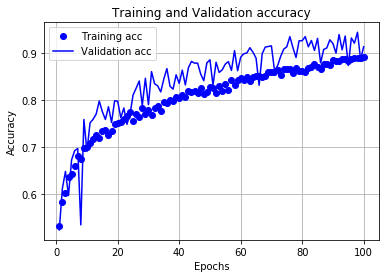

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

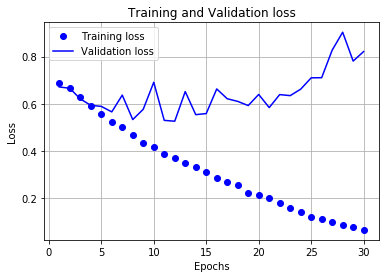

In [12]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

#### Setting up a data augmentation configuration via ImageDataGenerator

In [13]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

#### Displaying some randomly augmented training images

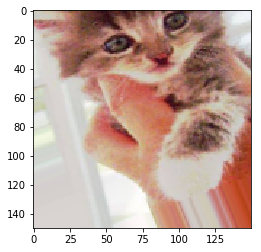

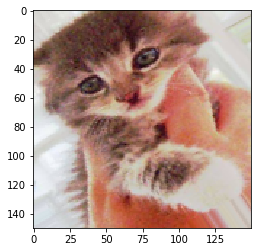

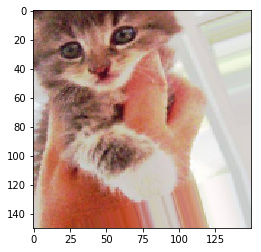

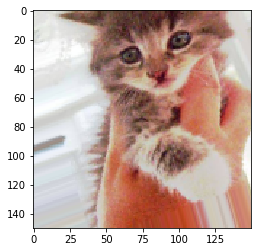

In [14]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### Defining a new convnet that includes dropout

In [15]:
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
___________________________

In [16]:
model.compile(loss = 'binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics = ['acc'])

#### Training the convnet usign data-augmentation generators

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 128s 1s/step - loss: 0.6880 - acc: 0.5368 - val_loss: 0.6810 - val_acc: 0.5241
Epoch 2/100
100/100 [==============================] - 110s 1s/step - loss: 0.6672 - acc: 0.5859 - val_loss: 0.6444 - val_acc: 0.6121
Epoch 3/100
100/100 [==============================] - 100s 996ms/step - loss: 0.6549 - acc: 0.6053 - val_loss: 0.6227 - val_acc: 0.6485
Epoch 4/100
100/100 [==============================] - 102s 1s/step - loss: 0.6330 - acc: 0.6381 - val_loss: 0.6870 - val_acc: 0.5973
Epoch 5/100
100/100 [==============================] - 106s 1s/step - loss: 0.6221 - acc: 0.6413 - val_loss: 0.5897 - val_acc: 0.6732
Epoch 6/100
100/100 [==============================] - 111s 1s/step - loss: 0.6039 - acc: 0.6619 - val_loss: 0.5578 - val_acc: 0.6927
Epoch 7/100
100/100 [==============================] - 115s 1s/step - loss: 0.5860 - acc: 0.6772 - val_loss: 0.5460 - val_acc: 0.6973
Epoch 8/100
100/100 [==============================] - 115s

In [19]:
model.save('cats_and_dogs_small_2.h5')

#### Displaying curves of loss and accuracy during training

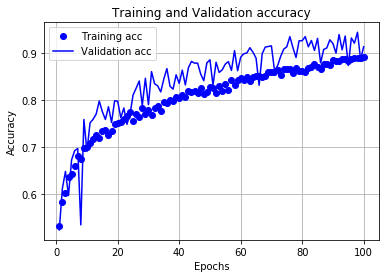

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

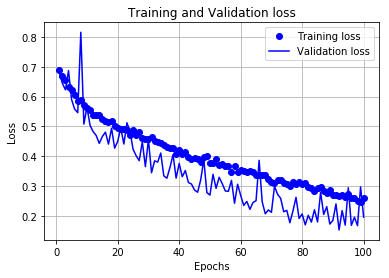

In [21]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

###### Pablo Minango
* pablodavid218@gmail.com 